In [402]:
import pandas as pd
from utils.createCSV import createCSV
from matplotlib import pyplot as plt
from utils.dataloader import CustomImageDataset
import torchvision.transforms as transforms
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset, DataLoader
from utils.transformations import CustomTransformations

torch.Size([2, 3, 244, 244])
torch.Size([2, 3])
Feature batch shape: torch.Size([2, 3, 244, 244])
Labels batch shape: torch.Size([2, 3])


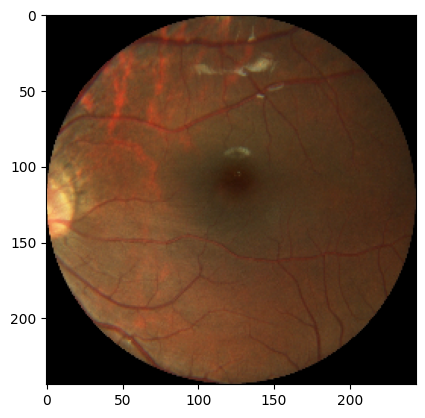

In [403]:
#PRUEBA
train_transforms = transforms.Compose([
    transforms.Resize((244,244)),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    # transforms.RandomRotation(30),
    transforms.RandomChoice([
                             # transforms.CenterCrop(480),
                             transforms.RandomRotation(20),
                             transforms.RandomCrop((244,244)),
                             # transforms.ColorJitter(brightness=0.8, contrast=0.1, saturation=0.4, hue=0.4)
                            ]),
    
    # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    
])

# train_transforms = transforms

dataset = CustomImageDataset(annotations_file = "./output.csv", img_dir = "../test/", num_clases=3, transform = train_transforms, target_transform=None)
dl = DataLoader(dataset,batch_size=2,shuffle=False)


for image, label in dl:
    print(image.shape)
    print(label.shape)
    break
    
train_features, train_labels = next(iter(dl))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
img = img.permute(1,2,0).type(torch.uint8)
plt.imshow(img)
plt.show()


torch.Size([2, 3, 1444, 1444])
torch.Size([2, 3])
Feature batch shape: torch.Size([2, 3, 1444, 1444])
Labels batch shape: torch.Size([2, 3])


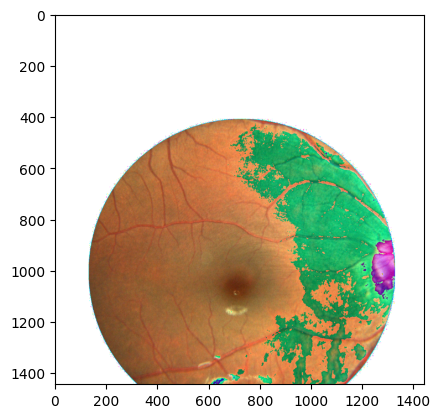

In [407]:
#TRANSFORMACIÓN REALIZADA CORRECTAMENTE
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), scale=(0.8, 1.2)),
    #transforms.toTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))     
])



dataset = CustomImageDataset(annotations_file = "./output.csv", img_dir = "../test/", num_clases=3, transform = train_transforms, target_transform=None)
dl = DataLoader(dataset,batch_size=2,shuffle=False)


for image, label in dl:
    print(image.shape)
    print(label.shape)
    break
    
img = train_features[0]
train_features, train_labels = next(iter(dl))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = img.permute(1,2,0).type(torch.uint8)
plt.imshow(img)
plt.show()